# Juego de la Vida de Conway

  

El Juego de la Vida de Conway es un autómata celular, creado por el matemático británico John Horton Conway en 1970. A pesar de sus reglas simples, el juego puede generar patrones complejos y sorprendentes. Es un ejemplo clásico de un sistema dinámico que exhibe comportamientos emergentes.

## Reglas del Juego:

  

1.  **Tablero**: El juego se desarrolla en un tablero bidimensional, donde cada celda puede estar viva o muerta. El tablero es infinito en todas direcciones, pero en la práctica se utiliza un tablero de tamaño finito.

  

2.  **Estado inicial** :El juego comienza con un patrón inicial de celulas vivas y muertas

  

3.  **Evolución**: Se consideraron dos juegos, el cual funcionan de la siguiente manera:

  

	-  **Juego de la vida de 2 especies**: En cada iteración, las células evolucionan de acuerdo con las siguientes reglas:

		1.  **Nacimiento**: Si una célula está muerta en la generación actual y tiene exactamente tres vecinos vivos, entonces la célula nace en la siguiente generación.

		2.  **Supervivencia**: Si una célula está viva en la generación actual y tiene dos o tres vecinos vivos en total, entonces la célula sobrevive en la siguiente generación. Además, si el número de vecinos de la otra especie es menor o igual a dos, la célula también sobrevive.

		3.  **Muerte**: Una célula viva muere en la siguiente generación si tiene menos de dos vecinos vivos o mas de tres vecinos vivos. Además, si el número de vecinos de la otra especie es mayor que dos, la célula también muere.

  

	-  **Juego de la vida de 2 especies con depredación**: En cada iteración, las células evolucionan de acuerdo con las siguientes reglas:

		1.  **Nacimiento**: Si una célula está muerta en la generación actual y tiene exactamente tres vecinos vivos, entonces la célula nace en la siguiente generación.

		2.  **Supervivencia**: Si una célula está viva en la generación actual y tiene dos o tres vecinos vivos en total, entonces la célula sobrevive en la siguiente generación. Además, si el número de vecinos de la otra especie es menor o igual a dos, la célula también sobrevive.

		3.  **Muerte**: Una célula viva muere en la siguiente generación si tiene menos de dos vecinos vivos o mas de tres vecinos vivos. Además, si el número de vecinos de la otra especie es mayor que dos, la célula también muere.
		4. **Depredación**: Si una célula viva tiene exactamente dos vecinos vivos de la otra especie, entonces la célula es remplazada por una célula de la otra especie en la siguiente generación.

4. **Iteración**: Estas reglas se aplican simultáneamente a todas las células en cada generación, creando una nueva generación de células. Este proceso se repite para cada generación subsiguiente. 

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rd
import matplotlib.colors
from celluloid import Camera
from IPython.display import HTML,display
import scipy.stats as st


## Juego de la vida de 2 especies

In [194]:
def count(M,i,j):
    
    '''
    Cuenta la cantidad de células vecinas de tipo 1 y 2 que rodean a la célula que habita la celda i,j.

    INPUT: 
    M: arreglo bidimensional de numpy que representa la distribución de células en un momento dado.
    i: fila en la que se encuentra la célula cuyos vecinos serán contados.
    j: columna en la que se encuentra la célula cuyos vecinos serán contados.

    OUTPUT:
    one: número de células de tipo 1 que rodean a la célula en la posición i,j.
    two: número de células de tipo 2 que rodean a la célula en la posición i,j.
    '''

    m = M[i-1:i+2,j-1:j+2]  #Matriz 3x3 que rodea a la celda i,j.
    L = np.array([[0,0],[1,0],[0,1]])  #Lista que se empleará para descontar el elemento i,j de la suma de sus vecinos que lo rodean.

    one = np.sum(np.array([m.tolist()[i].count(1) for i in range(len(m.tolist()))]))-L[int(m[1,1]),0]  
    two = np.sum(np.array([m.tolist()[i].count(2) for i in range(len(m.tolist()))]))-L[int(m[1,1]),1]

    return (one,two)

In [195]:
def Destiny(xij,N1,N2):

    '''
    Determina cual será el valor de la celda i,j en la siguiente iteración.

    INPUT:
    xij: valor de la celda i,j en la iteración k.
    N1: número de vecinos de tipo 1 de la célula i,j.
    N2: número de vecinos de tipo 2 de la célula i,j.

    OUTPUT:
    Xij: valor de la celda i,j en la iteración k+1.
    '''
    
    n12 = np.array([1,2])  #Arreglo con los tipos de células vivas. 
    N12 = np.array([N1,N2])  #Arreglo con la cantidad de vecinos de cada tipo. 
    Xij = 0

    #Nota: los arreglos n12 y N12 serán empleados para reducir a la mitad la cantidad de condicionales
    #necesarios para plantear las condiciones de supervivencia o muerte.

    #Condiciones para tener un nacimiento:

    if xij==0: 
        if N1==3 and N2<=2:  
            Xij = 1
        elif N2==3 and N1<=2: 
            Xij = 2
        else:
            Xij = 0     
    else:

        #Condición de supervivencia:

        if int(N12[n12==xij]) in {2,3} and int(N12[n12!=xij])<=2:  
            Xij = xij

        #Condición de muerte:

        elif int(N12[n12==xij])>3 or int(N12[n12==xij])<2 or int(N12[n12!=xij])>2:  
            Xij = 0
        else:
            Xij = 0
    return Xij

In [196]:
#0) Número de iteraciones:

N = 1000

#1) Tamaño de la matriz de células:

row = 50
col = 50
Boards = np.zeros((N,row,col))  #Arreglo que almacenará las matrices 50x50 en las 1000 iteraciones.
boards = np.zeros((N,row+2,col+2))  #Arreglo que almacenará las matrices 50x50 en las 1000 iteraciones, pero con dos filas y dos columnas extra. 

#Las dos filas y las dos columnas extra de las matrices de boards, tienen el objetivo de permitir el conteo de las células vecinas de las posiciones
#que se encuentren en los bordes, sin que hayan errores por índices fuera de rango. 

#2) La proporción de especies será 3/3/4, 3 de la especie 1, 3 de la especie 2, y 4 muertas:

zeros = np.array([0 for i in range(4)])
ones = np.array([1 for i in range(3)])
twos = np.array([2 for i in range(3)])

choices = np.concatenate((zeros,ones,twos))

#3) Asignación aleatoria de la distribución de las celdas:

Board_0 = np.array([rd.choice(choices,col) for i in range(row)])  #Distribución de las células en la iteración 0.

Boards[0] = Board_0
boards[0,1:row+1,1:col+1] = Board_0

for k in range(N-1):
    for i in range(1,row+1):
        for j in range(1,col+1):

            #Implementación de las funciones count y Destiny para encontrar el número de células vecinas de la celda i,j en la iteración k, 
            #y determinar el valor de la celda i,j en la iteración k+1.

            N1,N2 = count(boards[k],i,j)
            boards[k+1,i,j] = Destiny(boards[k,i,j],N1,N2)
    
    Boards[k+1] = boards[k+1,1:row+1,1:col+1]

/tmp/ipykernel_9522/2760805788.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(N12[n12==xij]) in {2,3} and int(N12[n12!=xij])<=2:
/tmp/ipykernel_9522/2760805788.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif int(N12[n12==xij])>3 or int(N12[n12==xij])<2 or int(N12[n12!=xij])>2:


In [197]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","deepskyblue","orangered"])
fig, ax = plt.subplots(figsize=(8,7))
cam = Camera(fig)

for i in range(N):
    ax.imshow(Boards[i],cmap=cmap)
    cam.snap()

plt.close()

In [198]:
anim = cam.animate(interval=100)
anim.save('anim.gif')  # Para guardar animación, remover el comentario
HTML(anim.to_html5_video())

## Juego de la vida 2

2. Condición adicional de competencia: Pueden incluir una condición adicional en la que una célula se alimente de otra para incluir una dinámica de cazador-presa. Por ejemplo, si una célula A está rodeada por dos células B esta cambia a ser célula tipo B. Sería similar a considerar que las células B fagocitaron la célula A y se produjeron una nueva célula B en su lugar.

In [199]:
def Destiny_v2(xij,N1,N2):

    #Es igual que la función "Destiny", pero con la condición extra de depredación. 

    '''
    Determina cual será el valor de la celda i,j en la siguiente iteración.

    INPUT:
    xij: valor de la celda i,j en la iteración k.
    N1: número de vecinos de tipo 1 de la célula i,j.
    N2: número de vecinos de tipo 2 de la célula i,j.

    OUTPUT:
    Xij: valor de la celda i,j en la iteración k+1.
    '''
    
    n12 = np.array([1,2])
    N12 = np.array([N1,N2])
    Xij = 0

    if xij==0:  #Nacimiento
        if N1==3 and N2<=2:  
            Xij = 1
        elif N2==3 and N1<=2: 
            Xij = 2
        else:
            Xij = 0     
    else:
        if int(N12[n12==xij]) in {2,3} and int(N12[n12!=xij])<2:  #Supervivencia
            Xij = xij
        elif int(N12[n12==xij])>3 or int(N12[n12==xij])<2 or int(N12[n12!=xij])>2:  #Muerte
            Xij = 0
        elif int(N12[n12!=xij])==2:   #Depredación
            Xij = int(n12[n12!=xij])
        else:
            Xij = 0
    return Xij

In [200]:
#0) Número de iteraciones

N = 1000

#1) Tamaño de la matriz de células.

row = 50
col = 50
boards2 = np.zeros((N,row+2,col+2))
Boards2 = np.zeros((N,row,col))

#2) La proporción de especies será 3/3/4, 3 de la especie 1, 3 de la especie 2, y 4 muertas:

zeros = np.array([0 for i in range(4)])
ones = np.array([1 for i in range(3)])
twos = np.array([2 for i in range(3)])

choices = np.concatenate((zeros,ones,twos))

#3) Asignación aleatoria de la distribución de las celdas:

Board_0 = np.array([rd.choice(choices,col) for i in range(row)])

Boards2[0] = Board_0
boards2[0,1:row+1,1:col+1] = Board_0

for k in range(N-1):
    for i in range(1,row+1):
        for j in range(1,col+1):

            N1,N2 = count(boards2[k],i,j)
            boards2[k+1,i,j] = Destiny_v2(boards2[k,i,j],N1,N2)
    
    Boards2[k+1] = boards2[k+1,1:row+1,1:col+1]

/tmp/ipykernel_9522/3924080497.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(N12[n12==xij]) in {2,3} and int(N12[n12!=xij])<2:  #Supervivencia
/tmp/ipykernel_9522/3924080497.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif int(N12[n12==xij])>3 or int(N12[n12==xij])<2 or int(N12[n12!=xij])>2:  #Muerte
/tmp/ipykernel_9522/3924080497.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif int(N12[n12!=xij])==2:   #Depredación
/tmp/ipykernel_95

In [201]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","deepskyblue","orangered"])
fig, ax = plt.subplots(figsize=(8,7))
cam = Camera(fig)

for i in range(N):
    ax.imshow(Boards2[i],cmap=cmap)
    cam.snap()

plt.close()

In [202]:
anim = cam.animate(interval=100)
anim.save('anim2.mp4')  # Para guardar animación, remover el comentario
HTML(anim.to_html5_video())

## Histogramas de evolución de las células

In [203]:
dist_liv=np.array([2500-Boards[i].reshape(2500).tolist().count(0) for i in range(N)])
dist_A=np.array([Boards[i].reshape(2500).tolist().count(1) for i in range(N)])
dist_B=np.array([Boards[i].reshape(2500).tolist().count(2) for i in range(N)])

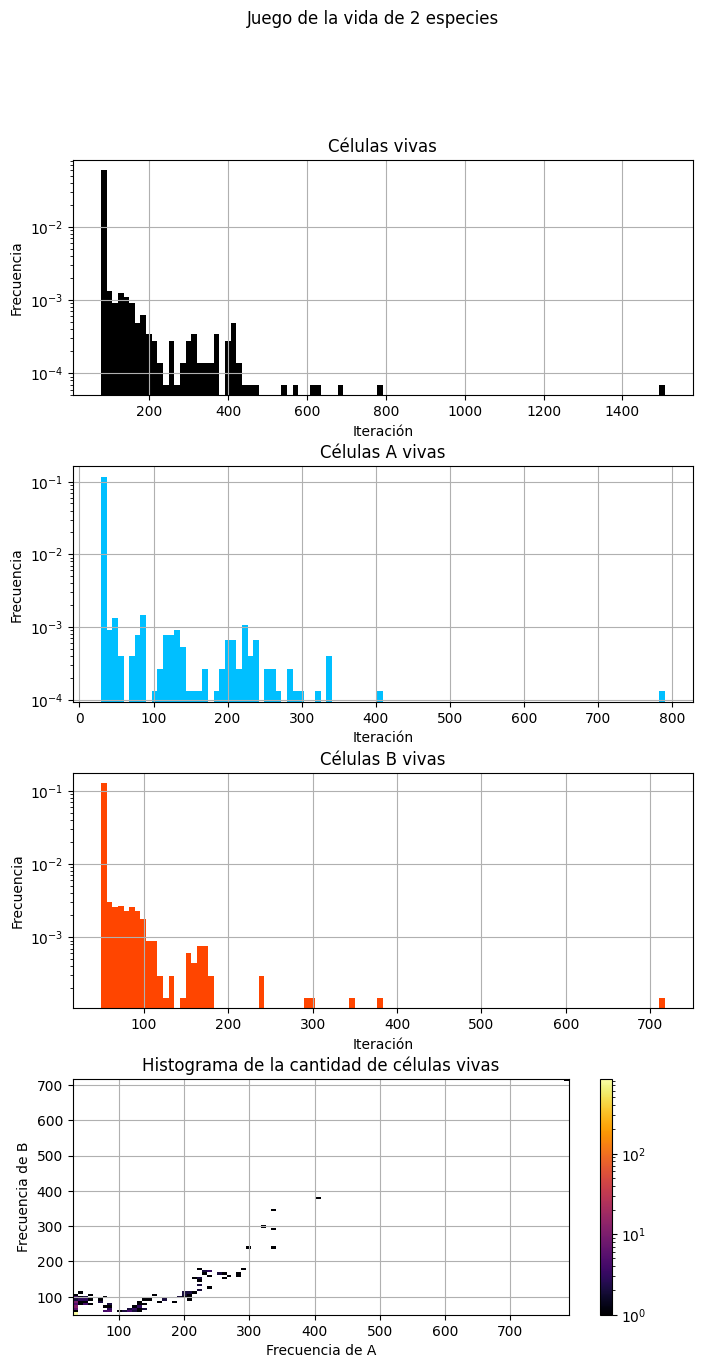

In [204]:
fig, ax = plt.subplots(4,figsize=(8,15))

hist_liv = ax[0].hist(np.array(dist_liv),bins=100,color='k',density=True,log=True)
ax[0].set(title='Células vivas',xlabel='Iteración',ylabel='Frecuencia')
hist_A = ax[1].hist(np.array(dist_A),bins=100,color='deepskyblue',density=True,log=True)
ax[1].set(title='Células A vivas',xlabel='Iteración',ylabel='Frecuencia')
hist_B = ax[2].hist(np.array(dist_B),bins=100,color='orangered',density=True,log=True)
ax[2].set(title='Células B vivas',xlabel='Iteración',ylabel='Frecuencia')
hist_2D = ax[3].hist2d(dist_A,dist_B,bins=100,cmap='inferno',norm=matplotlib.colors.LogNorm())
cbar = fig.colorbar(hist_2D[3])
ax[3].set(title='Histograma de la cantidad de células vivas',xlabel='Frecuencia de A',ylabel='Frecuencia de B')
plt.subplots_adjust(wspace=0.2,
                    hspace=0.3)
fig.suptitle('Juego de la vida de 2 especies')
for ax_ in ax:
    ax_.grid() 
plt.show()

In [205]:
dist_liv2=np.array([2500-Boards2[i].reshape(2500).tolist().count(0) for i in range(N)])
dist_A2=np.array([Boards2[i].reshape(2500).tolist().count(1) for i in range(N)])
dist_B2=np.array([Boards2[i].reshape(2500).tolist().count(2) for i in range(N)])

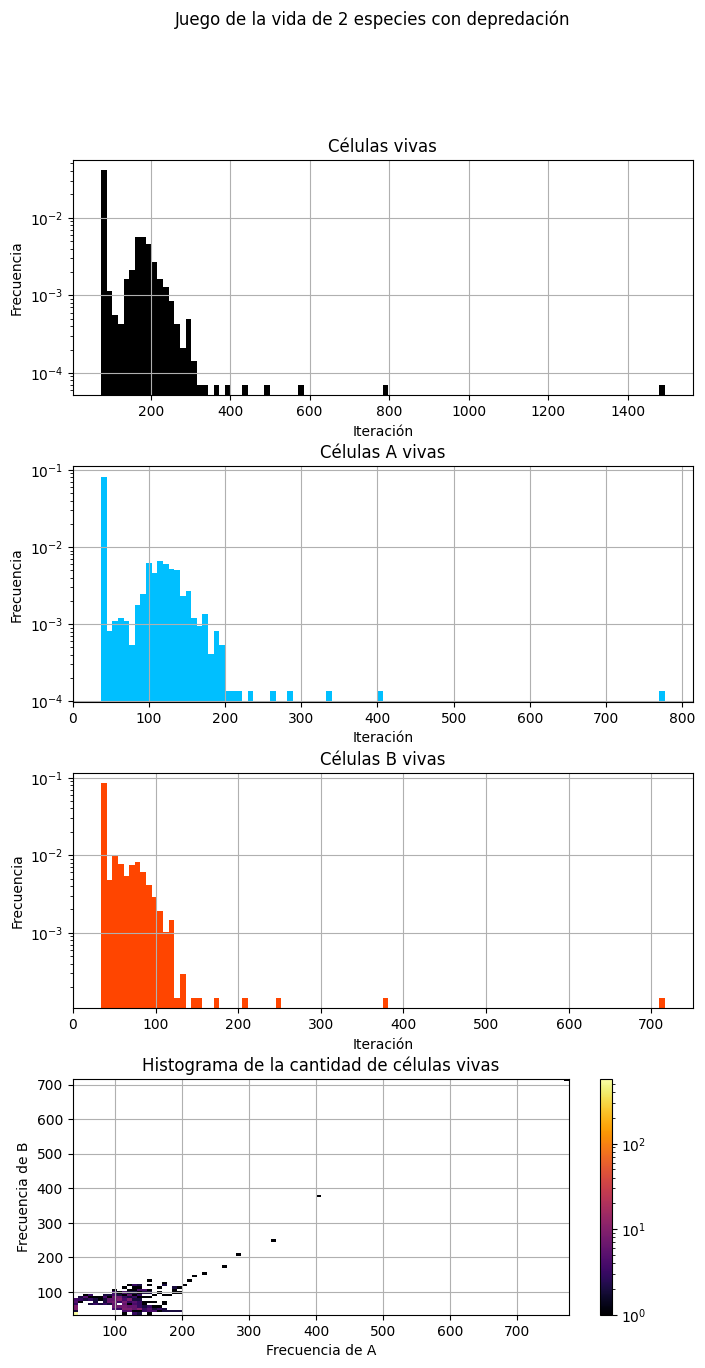

In [206]:
fig, ax = plt.subplots(4,figsize=(8,15))

hist_liv2 = ax[0].hist(np.array(dist_liv2),bins=100,color='k',density=True,log=True)
ax[0].set(title='Células vivas',xlabel='Iteración',ylabel='Frecuencia')
hist_A2 = ax[1].hist(np.array(dist_A2),bins=100,color='deepskyblue',density=True,log=True)
ax[1].set(title='Células A vivas',xlabel='Iteración',ylabel='Frecuencia')
hist_B2 = ax[2].hist(np.array(dist_B2),bins=100,color='orangered',density=True,log=True)
ax[2].set(title='Células B vivas',xlabel='Iteración',ylabel='Frecuencia')
hist_2D2 = ax[3].hist2d(dist_A2,dist_B2,bins=100,cmap='inferno',norm=matplotlib.colors.LogNorm())
cbar = fig.colorbar(hist_2D2[3])
ax[3].set(title='Histograma de la cantidad de células vivas',xlabel='Frecuencia de A',ylabel='Frecuencia de B')
plt.subplots_adjust(wspace=0.2,
                    hspace=0.3)
fig.suptitle('Juego de la vida de 2 especies con depredación')
for ax_ in ax:
    ax_.grid() 
plt.show()

## Generación de estados aleatorios

Para la implementación del algoritmo _Metrópolis_, se aproxima el histograma con una f.d.p continua a través del método de _estimación de densidad de kernel_, que consiste en proponer una densidad de probabilidad que aproxime la distribución discreta a través de una suma finita de funciones kernel centradas en cada uno de los datos, dada por (ref. https://es.wikipedia.org/wiki/Estimaci%C3%B3n_de_Densidad_de_Kernel):

$$\hat{f}_h(\vec{x})=\frac{1}{nh}\displaystyle\sum_{i=1}^nK\left(\frac{\vec{x}-\vec{x}_i}{h}\right)$$

donde $h$ es el parámetro de suavizado de la función y las funciones kernel escogidas son proporcionales a distribuciones normales multivariadas: $K(\frac{\vec{x}-\vec{x}_i}{h})\propto\mathcal{N}(\vec{x_i},\Sigma_{ij})$, con $\vec{x_i}=(x_i,y_i)$ el punto donde está centrada cada función $K$, i.e. la media, y $\Sigma_{ij}$ es la matriz de covarianza. La implementación se hizo utilizando la función `gaussian_kde` de `scipy.stats`.

In [207]:
# f.d.p. continua de N_A y N_B, generada con el método kde

vals_gol = np.vstack([dist_A2,dist_B2])
kde = st.gaussian_kde(vals_gol)

In [208]:
# Algoritmo metrópolis para la distribución de interés

A_0,B_0 = rd.randint(0,2500,2)
while A_0+B_0>2500:   # Garantiza que N_A+N_B<=N_T
  A_0,B_0 = rd.randint(0,2500,2)

As = [A_0]
Bs = [B_0]

# Implementación de metrópolis
while len(As)<1000:
  A_p,B_p = rd.randint(0,2500,2)
  while A_p+B_p>2500:
    A_p,B_0 = rd.randint(0,2500,2)
  
  d_S = -np.log(kde(np.vstack([A_p,B_p]))/kde(np.vstack([As[-1],Bs[-1]])))

  if d_S<0:
    As.append(A_p)
    Bs.append(B_p)

  elif d_S>0:
    x = np.random.random()

    if x<kde(np.vstack([A_p,B_p]))/kde(np.vstack([As[-1],Bs[-1]])):
      As.append(A_p)
      Bs.append(B_p)

    elif x>kde(np.vstack([A_p,B_p]))/kde(np.vstack([As[-1],Bs[-1]])):
      pass

/tmp/ipykernel_9522/2845720760.py:16: RuntimeWarning: divide by zero encountered in divide
  d_S = -np.log(kde(np.vstack([A_p,B_p]))/kde(np.vstack([As[-1],Bs[-1]])))
/tmp/ipykernel_9522/2845720760.py:16: RuntimeWarning: divide by zero encountered in log
  d_S = -np.log(kde(np.vstack([A_p,B_p]))/kde(np.vstack([As[-1],Bs[-1]])))


Habiendo generado los 1000 estados, se puede obtene la distribución de probabilidad, dada por el histograma 2-dimensional.

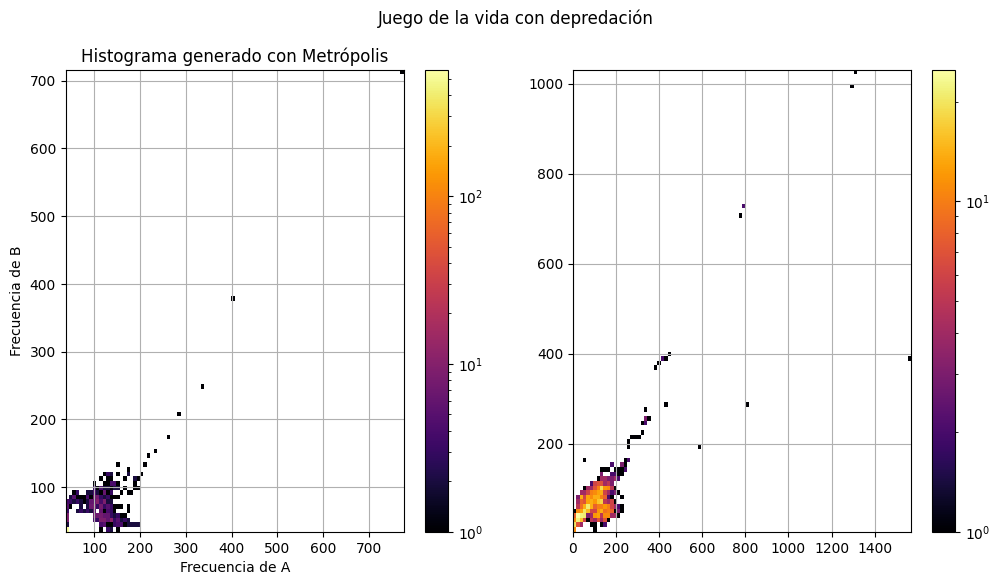

In [209]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
H1 = ax[0].hist2d(dist_A2,dist_B2,bins=100,cmap='inferno',norm=matplotlib.colors.LogNorm())
ax[0].set(title='Histograma de la simulación',xlabel='Frecuencia de A',ylabel='Frecuencia de B')
H2 = ax[1].hist2d(As,Bs,bins=100,cmap='inferno',norm=matplotlib.colors.LogNorm())
ax[0].set(title='Histograma generado con Metrópolis',xlabel='Frecuencia de A',ylabel='Frecuencia de B')
fig.suptitle('Juego de la vida con depredación')
ax[0].grid()
ax[1].grid()
cbar1 = fig.colorbar(H1[3])
cbar2 = fig.colorbar(H2[3])

plt.show()

Nótese que la forma de la distribución de los estados generados con Metrópolis es lo suficientemente parecida a la distribución original, presentanto, naturalmente, discrepancias, que pueden ser debidas a la alta densidad de estados producidos por la rápida estabilización del sistema